<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/missions_wmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WMAP for Microwave Astronomy**

WMAP source: https://map.gsfc.nasa.gov/

### **Cosmic Microwave Background (CMB)**

In [ ]:
!pip install healpy astropy scipy -q
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp

In [ ]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [ ]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

12288


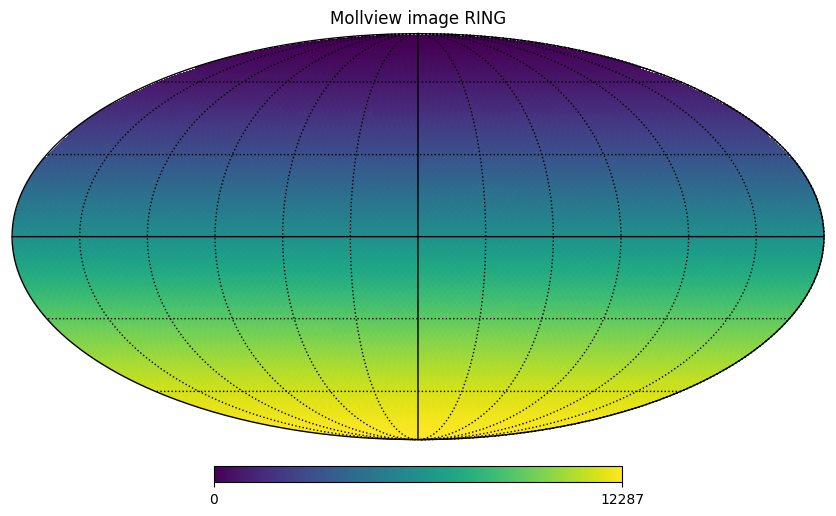

In [ ]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [ ]:
!wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

--2024-10-31 07:16:24--  http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68, 2001:4d0:2310:150::68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits [following]
--2024-10-31 07:16:24--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100676160 (96M)
Saving to: ‘wmap_band_iqumap_r9_7yr_W_v4.fits’

wmap_band_iqumap_r9 100%[===================>]  96.01M  30.5MB/s    in 3.2s    

2024-10-31 07:16:27 (30.3 MB/s) - ‘wmap_band_iqumap_r9_7yr_W_v4.fits’ saved [100676160/100676160]

URL transforme

In [ ]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")

In [ ]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

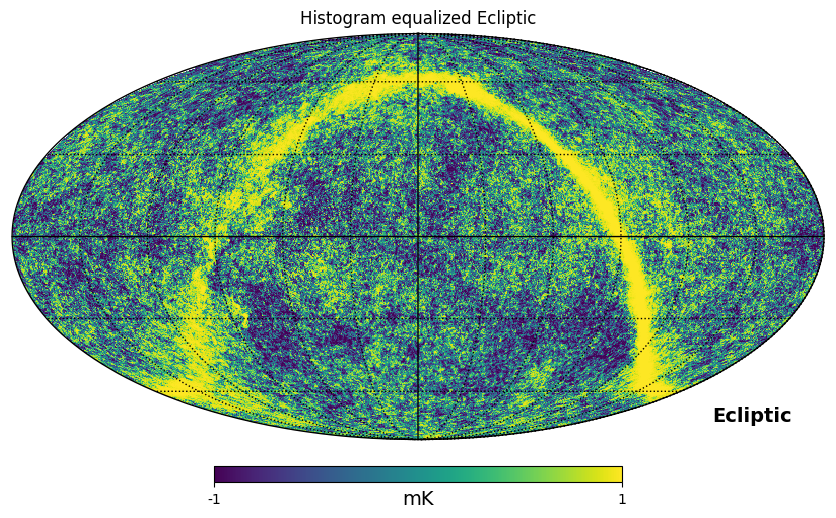

In [ ]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

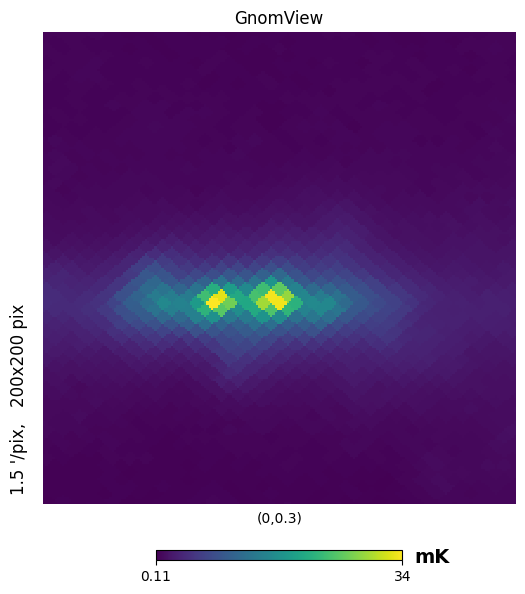

In [ ]:
hp.gnomview(wmap_map_I, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [ ]:
mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

In [ ]:
# Print the file information
wmap_band_iqumap_r9_7yr_W_v4.info()

NameError: name 'wmap_band_iqumap_r9_7yr_W_v4' is not defined

In [ ]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

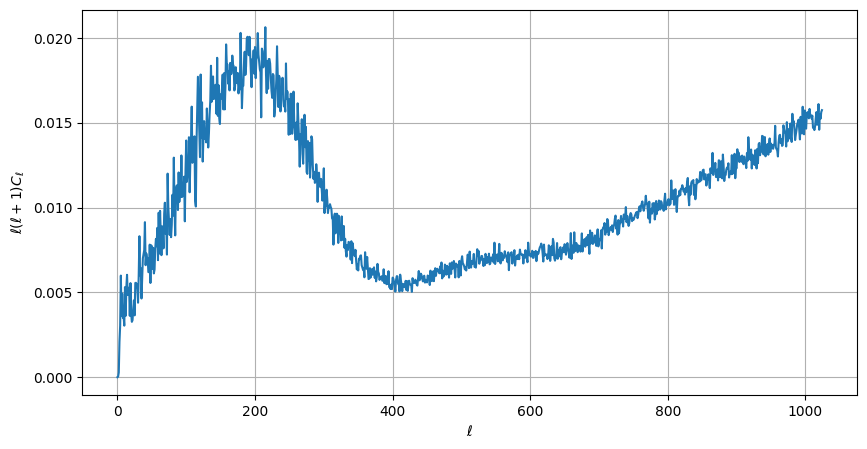

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

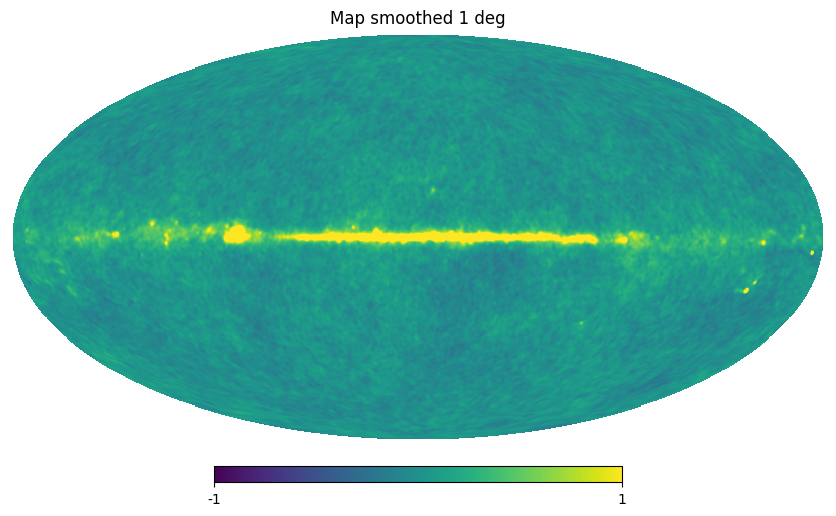

In [ ]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

https://healpy.readthedocs.io/en/latest/

Data Acquisition:CMB data is publicly available from missions like Planck and WMAP. You can download datasets (FITS format) from their archives.

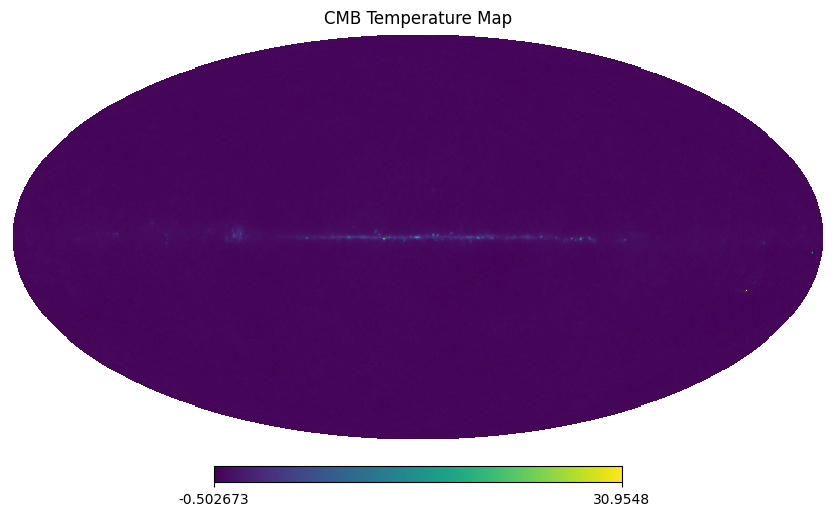

In [ ]:
import healpy as hp
map_data = hp.read_map('my_map.fits')
hp.mollview(map_data, title="CMB Temperature Map")

Analyzing the Power Spectrum: compute and plot the angular power spectrum, which gives insights into the statistical properties of the temperature fluctuations.

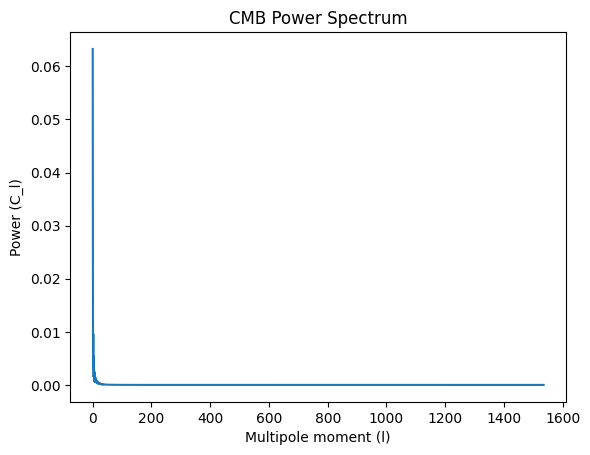

In [ ]:
cl = hp.anafast(map_data)
l = np.arange(len(cl))
plt.plot(l, cl)
plt.xlabel('Multipole moment (l)')
plt.ylabel('Power (C_l)')
plt.title('CMB Power Spectrum')
plt.show()